In [ ]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor

In [22]:
from benji_girgs import utils, generation, points
import os
import glob
import pandas as pd
import networkit

import networkit as nk


data_dir = '/Users/benjidayan/Documents/GIRG_data/'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne


IndexError: list index out of range

In [3]:
do_feature_extract.graph_dicts

[{'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-OR.SpaceOne',
  'Name': 'socfb-OR'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne',
  'Name': 'socfb-Caltech36'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne',
  'Name': 'socfb-Reed98'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne',
  'Name': 'socfb-Haverford76'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne',
  'Name': 'socfb-Simmons81'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne',
  'Name': 'socfb-Swarthmore42'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-wosn-friends.SpaceOne',
  'Name': 'socfb-wosn-friends'},
 {'Group': 'socfb',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne',
  'Name': 'socfb-Amherst41

In [18]:
import importlib
importlib.reload(feature_extractor)
# importlib.reload(points)
# importlib.reload(generation)

<module 'feature_extractor' from '../../nemo-eva/src/feature_extractor.py'>

const_in: 17.81335679543407
2.7556759606310757


76.55066666666667

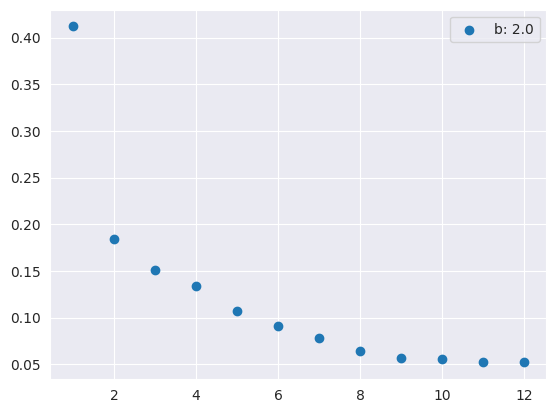

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

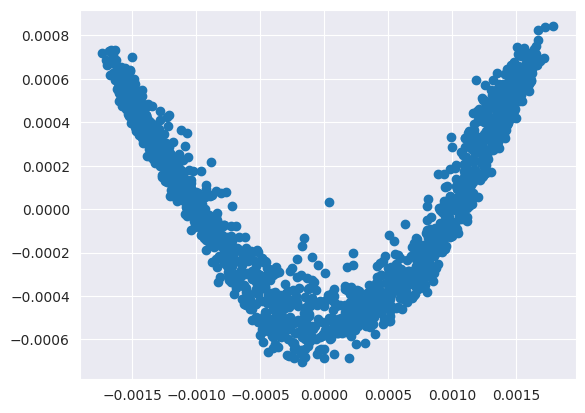

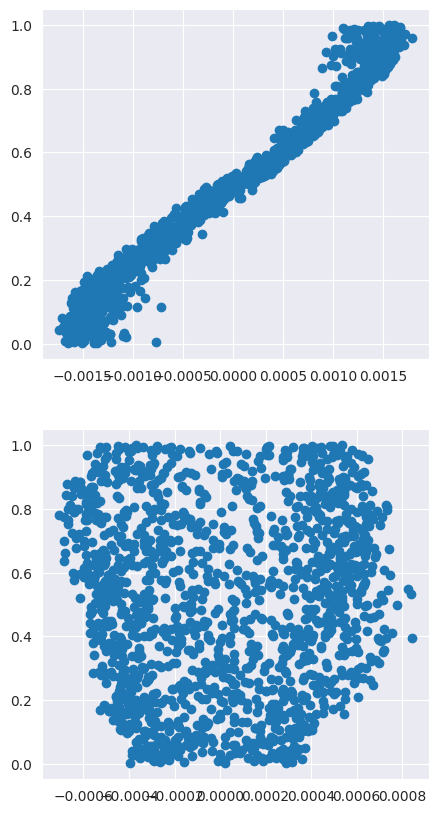

In [97]:

b = 2.0
n = 1500
d = 2
tau = 2.1
alpha=1.2
desiredAvgDegree=100.0

pp = points.get_points_distorted(np.array([1.0, b]), cube=True)

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
print(const)
utils.avg_degree(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5, eye_or_ones='eye')

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

fig, axes = plt.subplots(2, figsize=(5, 10))
axes[0].scatter(xs, pts_torus[:, 1])
axes[1].scatter(ys, pts_torus[:, 0])

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

array([[1.        , 0.98897894],
       [0.98897894, 1.        ]])

array([[1.        , 0.00380517],
       [0.00380517, 1.        ]])

<Figure size 640x480 with 0 Axes>

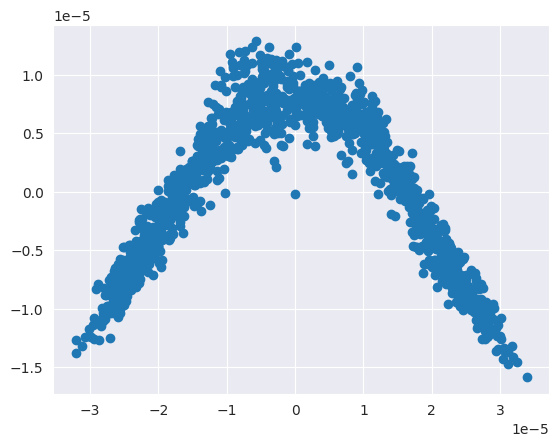

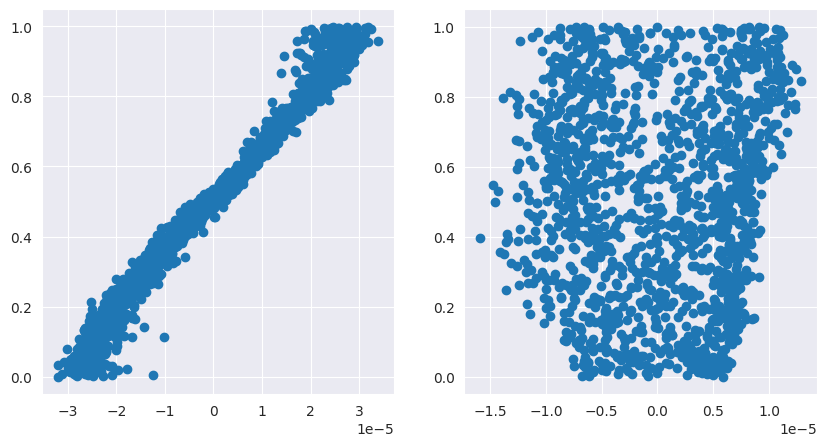

In [106]:
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.1, eye_or_ones='eye')

gnx = nk.nxadapter.nk2nx(g)
A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

M = np.diag(1/D) @ A
theta = 0.1
M_tilde = M @ np.diag(D**(-theta))
K = M_tilde.sum(axis=1)
K = 1/K
M_tilde = np.diag(K) @ M_tilde
M_tilde = 0.5* M_tilde + 0.5 * np.eye(M_tilde.shape[0])

# M_tilde = 0.5 * M_tilde + 0.5 * M_tilde.T

# w, Phi = np.linalg.eigh(M_tilde)

S = np.diag(1/K) @ np.diag(D_h) @ M_tilde @ np.diag(D_hi)
w,  V = np.linalg.eigh(S)
Phi = np.diag(D_hi) @ V
Psi = np.diag(D_h) @ V

n = Phi.shape[0]
w = np.flip(w)

# # Important bit!!!
Phi = np.diag(K) @ Phi

def diff_map(i, t):
    # n = 5, so 0, 1, 2, 3, 4, we want to get 3, 2, 1, 0
    # so 5-2 -> -1, -1
    return np.array([Phi[i, j] for j in range(n-2, -1, -1)]) * (w[1:]**t)



# ys = w[1:13]**8
# #     plt.figure()
# _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
# #     plt.show()
# plt.legend()
# plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xs, pts_torus[:, 1])
axes[1].scatter(ys, pts_torus[:, 0])

np.corrcoef(xs, pts_torus[:, 1])
np.corrcoef(ys, pts_torus[:, 0])

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

array([[ 1.        , -0.92617797],
       [-0.92617797,  1.        ]])

array([[ 1.        , -0.13264591],
       [-0.13264591,  1.        ]])

<Figure size 640x480 with 0 Axes>

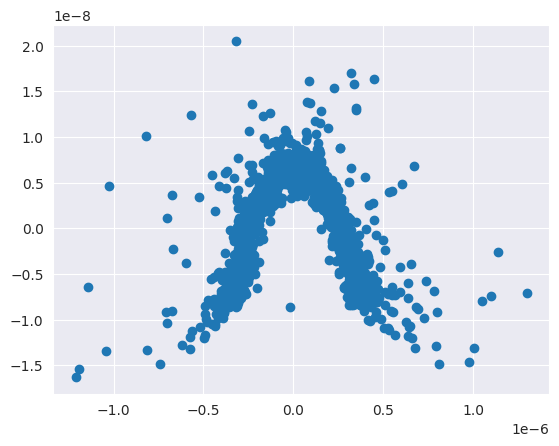

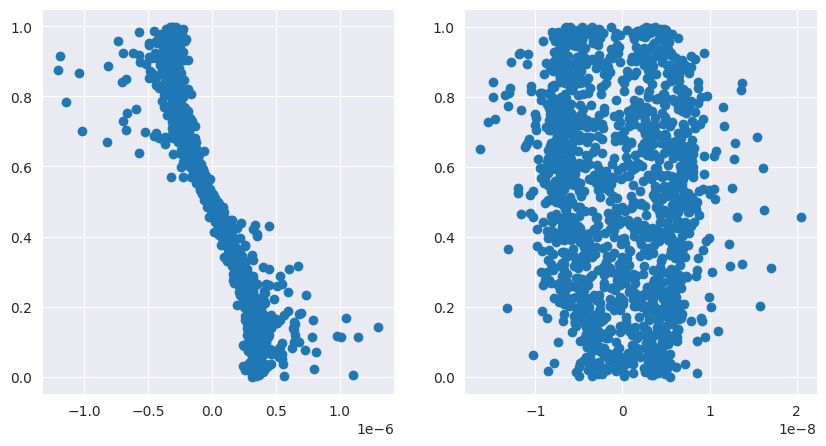

In [109]:
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.1, eye_or_ones='eye')

gnx = nk.nxadapter.nk2nx(g)
A = nx.linalg.adjacency_matrix(gnx).todense()

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

M = np.diag(1/D) @ A
theta = 0.1
M_tilde = M @ np.diag(D**(-theta))
K = M_tilde.sum(axis=1)
K = 1/K
M_tilde = np.diag(K) @ M_tilde
M_tilde = 0.9* M_tilde + 0.1 * np.eye(M_tilde.shape[0])

M_tilde = 0.5 * M_tilde + 0.5 * M_tilde.T

w, Phi = np.linalg.eigh(M_tilde)

# S = np.diag(1/K) @ np.diag(D_h) @ M_tilde @ np.diag(D_hi)
# w,  V = np.linalg.eigh(S)
# Phi = np.diag(D_hi) @ V
# Psi = np.diag(D_h) @ V
#
# n = Phi.shape[0]
# w = np.flip(w)
#
# # # Important bit!!!
# Phi = np.diag(K) @ Phi

def diff_map(i, t):
    # n = 5, so 0, 1, 2, 3, 4, we want to get 3, 2, 1, 0
    # so 5-2 -> -1, -1
    return np.array([Phi[i, j] for j in range(n-2, -1, -1)]) * (w[1:]**t)



# ys = w[1:13]**8
# #     plt.figure()
# _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
# #     plt.show()
# plt.legend()
# plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xs, pts_torus[:, 1])
axes[1].scatter(ys, pts_torus[:, 0])

np.corrcoef(xs, pts_torus[:, 1])
np.corrcoef(ys, pts_torus[:, 0])

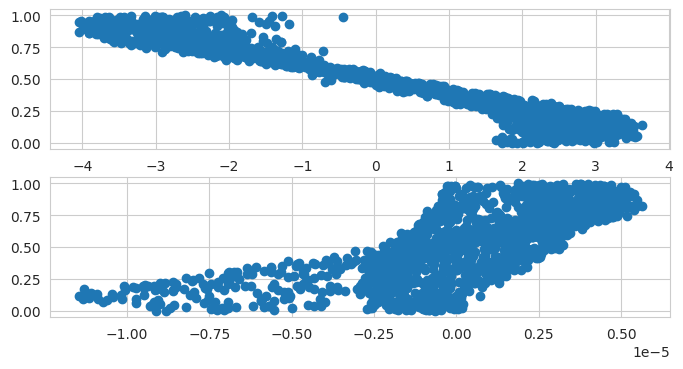

In [53]:
%time g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2)

In [37]:
%time g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2, c_implementation=True)

array([[-2.27648861e-03,  9.78728511e-03, -3.29964531e-04, ...,
         5.48493429e-03, -3.34522171e-03,  4.40287112e-03],
       [ 9.80758574e-05,  5.43800123e-03,  2.55801559e-03, ...,
        -1.27528795e-04, -7.84356018e-04,  4.39314073e-03],
       [-5.33633953e-03,  1.97933143e-03, -2.56636361e-03, ...,
        -1.61617588e-04,  4.03857555e-05,  4.63066089e-03],
       ...,
       [-6.28859270e-03, -4.29655098e-03,  4.78774822e-05, ...,
        -3.34759506e-03, -2.82227587e-03,  4.52255017e-03],
       [ 1.90422212e-03,  7.30596838e-04, -5.06632001e-03, ...,
         7.43621478e-03, -7.17558061e-03,  4.36982101e-03],
       [-1.98996710e-03,  6.36638359e-05, -2.09149866e-03, ...,
        -2.66990514e-03,  5.83875464e-03,  4.50578530e-03]])

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

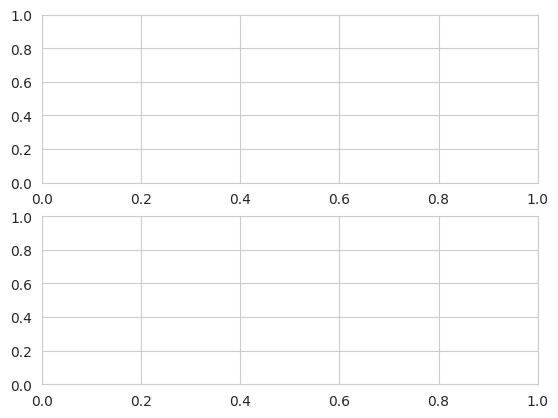

In [51]:
importlib.reload(utils)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


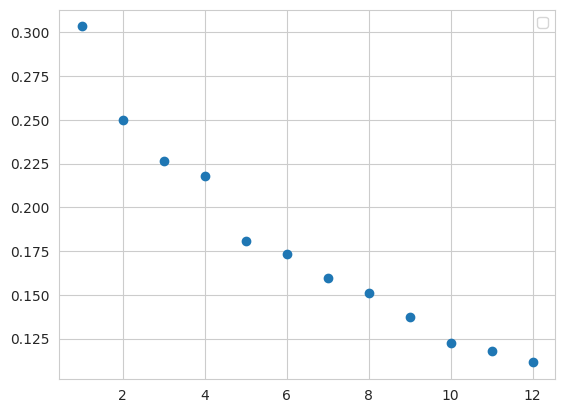

<Figure size 640x480 with 0 Axes>

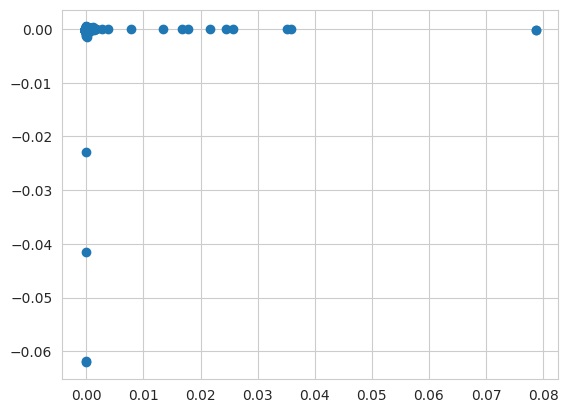

In [11]:
in_path = do_feature_extract.graph_dicts[1]['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys)
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

In [68]:
import networkx as nx

def get_diffmap(g, Iweighting=0.5, eye_or_ones="eye", theta=0.0):
    """
    Provided g is connected, find the diffusion map of g.
    w are the eigenvalues, decreasing from 1.0, lambda_2, lambda_3, ...
    diff_map(i) is the tth diffusion iteration of node i as a linear combination of Psi columns

    eye_or_ones is experimental. Bandeira uses identity (eye), but I wonder if ones might do
    a better job here?
    """
    if nk.components.ConnectedComponents(g).run().numberOfComponents() > 1:
        raise Exception("Graph is not connected")


    gnx = nk.nxadapter.nk2nx(g)

    # A = nx.linalg.adjacency_matrix(gnx).todense()
    #
    # D = np.array([x[1] for x in (gnx.degree)])
    # D_h = D**(0.5)
    # D_hi = D**(-0.5)
    #
    # n = A.shape[0]
    #
    # # M_ij = W_ij / d_i
    # M = np.diag(1/D) @ A
    # # M = (1-Iweighting)* M + Iweighting * np.eye(M.shape[0])
    # M = (1 - Iweighting) * M + Iweighting * (np.ones((n, n))/n if eye_or_ones == "ones" else np.eye(n))
    # # S_ij = W_ij / sqrt(d_i d_j) = sqrt(d_i) M_ij / sqrt(d_j)
    # S = np.diag(D**(0.5 -theta)) @ M @ np.diag(D**(-0.5 - theta))
    #
    #
    # w, V = np.linalg.eigh(S)
    #
    # # S = V @ np.diag(w) @ V.T
    # # M = D^{-1/2} @ S @ D^{1/2}
    # # = D^{-1/2} @ V @ np.diag(w) @ V.T @ D^{1/2}
    # # = Phi @ np.diag(w) @ Psi.T
    # # Phi = D^{-1/2} @ V
    # # Psi = D^{1/2} @ V
    # Phi = np.diag(D**(-0.5)) @ V
    # Psi = np.diag(D_h) @ V


    A = nx.linalg.adjacency_matrix(gnx).todense()

    D = np.array([x[1] for x in (gnx.degree)])
    D_h = D**(0.5)
    D_hi = D**(-0.5)

    n = A.shape[0]

    # M_ij = W_ij / d_i
    M = np.diag(1/D) @ A @ np.diag(D**(-theta))

    # M = (1-Iweighting)* M + Iweighting * np.eye(M.shape[0])
    M = (1 - Iweighting) * M + Iweighting * (np.ones((n, n))/n if eye_or_ones == "ones" else np.eye(n))
    # S_ij = W_ij / sqrt(d_i d_j) = sqrt(d_i) M_ij / sqrt(d_j)
    S = np.diag(D**(0.5 - theta)) @ M @ np.diag(D**(-0.5 - theta))

    w, V = np.linalg.eigh(S)

    # S = V @ np.diag(w) @ V.T
    # M = D^{-1/2} @ S @ D^{1/2}
    # = D^{-1/2} @ V @ np.diag(w) @ V.T @ D^{1/2}
    # = Phi @ np.diag(w) @ Psi.T
    # Phi = D^{-1/2} @ V
    # Psi = D^{1/2} @ V
    Phi = np.diag(D**(-0.5 + theta)) @ V
    Psi = np.diag(D**(0.5 + theta)) @ V

    n = Phi.shape[0]
    w = np.flip(w)

    def diff_map(i, t):
        # n = 5, so 0, 1, 2, 3, 4, we want to get 3, 2, 1, 0
        # so 5-2 -> -1, -1
        return np.array([Phi[i, j] for j in range(n-2, -1, -1)]) * (w[1:]**t)

    return w, Phi, Psi, diff_map, S, M, A, D

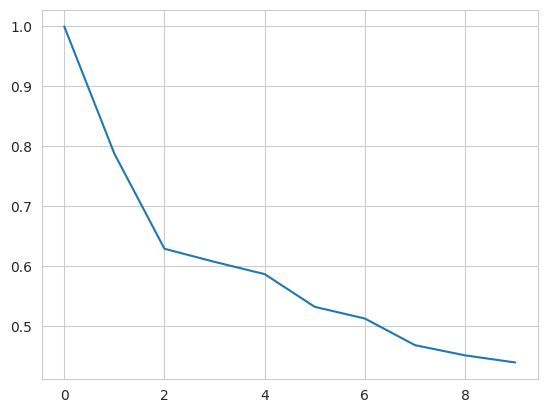

In [67]:
M_tilde = np.diag(1/D) @ A @ np.diag(D**(-0.1))
M_tilde = np.diag(1/M_tilde.sum(axis=1)) @ M_tilde
w, V = np.linalg.eig(M_tilde)

def diff_map(i, t):
    return np.array([V[i, j] for j in range(n-2, -1, -1)]) * (w[1:]**t)


In [66]:
np.linalg.eig(M_tilde)

(array([ 1.        ,  0.78800709,  0.62942763, ..., -0.00404619,
        -0.00589977, -0.0056839 ]),
 array([[ 0.02581989,  0.00066693,  0.03344107, ...,  0.00811564,
          0.00529785, -0.0067404 ],
        [ 0.02581989,  0.03114582, -0.01945269, ...,  0.01406257,
          0.00290888, -0.00934551],
        [ 0.02581989,  0.0265563 , -0.0129632 , ..., -0.01104297,
         -0.00987991, -0.00158758],
        ...,
        [ 0.02581989, -0.03152631, -0.03829473, ..., -0.03618946,
         -0.02644815, -0.04784413],
        [ 0.02581989,  0.00273809,  0.03424517, ..., -0.05127631,
         -0.02137662, -0.03826799],
        [ 0.02581989,  0.00010053,  0.02991103, ...,  0.06615937,
          0.01454121, -0.04357389]]))

In [63]:
M.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

const_in: 42.59536474463749
5.698256044951306


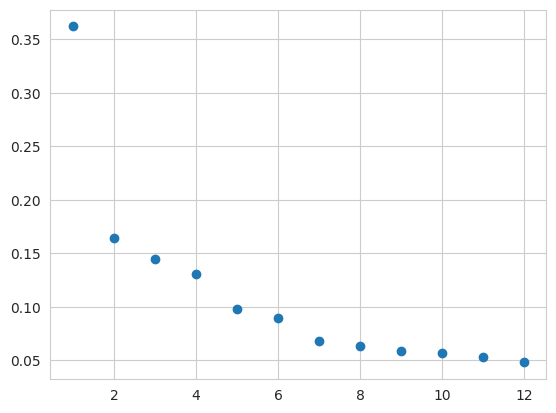

<Figure size 640x480 with 0 Axes>

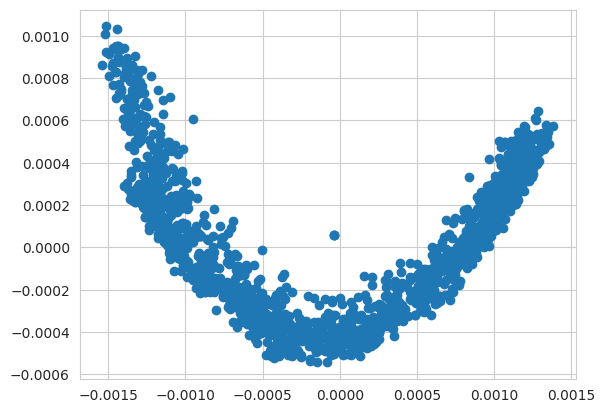

In [37]:
n = 1500
d = 2
tau = 2.1
alpha=1.2
desiredAvgDegree=100.0

pp = points.get_points_distorted(np.array([1.0, 2.0]), cube=True)

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
g = utils.get_largest_component(g)
print(const)
utils.avg_degree(g)

w, Phi, Psi, diff_map = get_diffmap(g)

ys = w[1:13]**8
plt.figure()
plt.scatter(list(range(1, len(ys)+1)), ys)
plt.show()

pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

const_in: 22.55533834977416


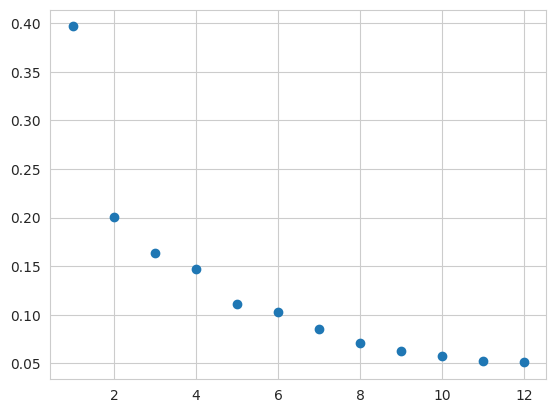

<Figure size 640x480 with 0 Axes>

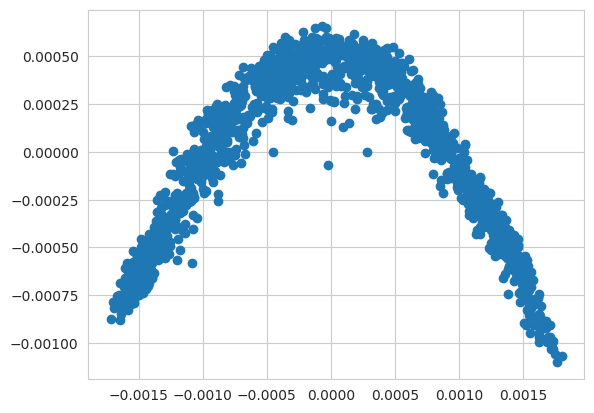

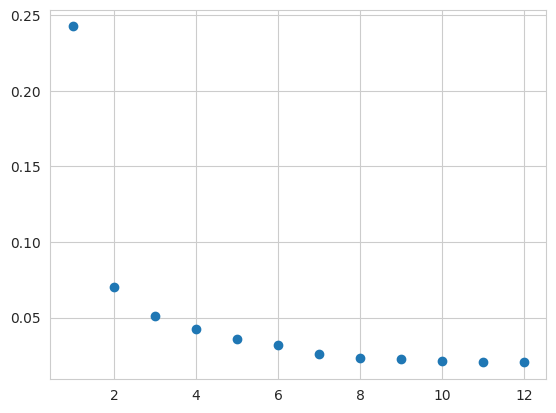

<Figure size 640x480 with 0 Axes>

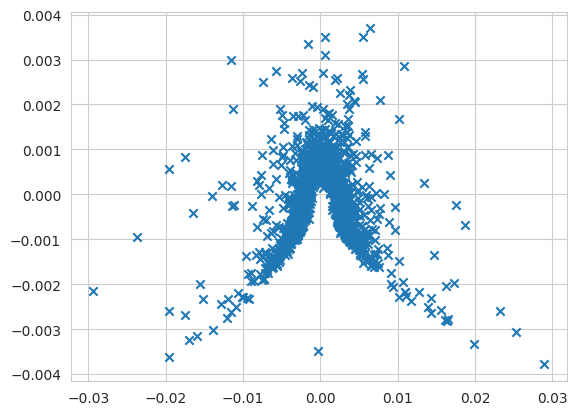

In [174]:
n = 1500
d = 2
tau = 2.1
alpha=1.2
desiredAvgDegree=100.0

pp = points.get_points_distorted(np.array([1.0, 2.0]), cube=True)

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
g = utils.get_largest_component(g)

w, Phi, Psi, diff_map, S, M, A, D = get_diffmap(g, theta=0.0)

z = w[1:13]**8
plt.figure()
plt.scatter(list(range(1, len(z)+1)), z)
plt.show()

pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)


M_tilde = np.diag(1/D) @ A @ np.diag(D**(-0.1))
K = 1/M_tilde.sum(axis=1)
M_tilde = np.diag(K) @ M_tilde
# M_tilde = 0.5 * M_tilde + 0.5 * M_tilde.T
w, V = np.linalg.eigh(M)

# w, V = np.linalg.eig(M)
# V = np.diag(K) @ Phi

U, s, VT = np.linalg.svd(np.eye(M.shape[0]) - M)
k = 2
S = np.zeros(M.shape)
S[:k, :k] = np.diag(s[:k])
w = s
V = U

def diff_map(i, t):
    return np.array([V[i, j] for j in range(n-2, -1, -1)]) * (w[1:]**t)

z = w[1:13]**8
plt.figure()
plt.scatter(list(range(1, len(z)+1)), z)
plt.show()

pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs2 = pts[:, 0]
ys2 = pts[:, 1]
plt.figure()
plt.scatter(xs2, ys2, marker='x')

In [170]:
zs2 = np.stack([xs2, ys2]).T
zs2.shape

zs = np.stack([xs, ys]).T
zs.shape

(1500, 2)

In [140]:
# normalise zs2 to be generally in the unit cube
zs2 = (zs2 - zs2.min(axis=0)) / (zs2.max(axis=0) - zs2.min(axis=0))

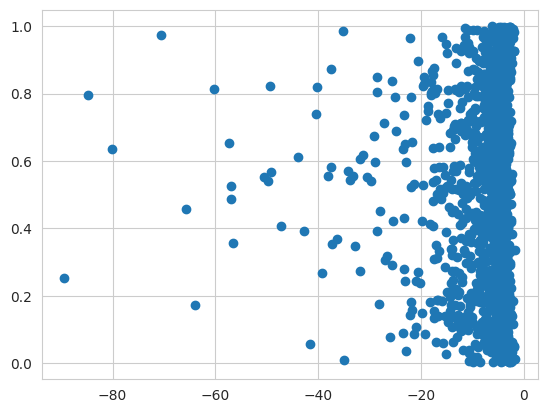

In [171]:
# check correlation between zs2 and pts_torus
plt.scatter(zs2[:, 0], pts_torus[:, 1])

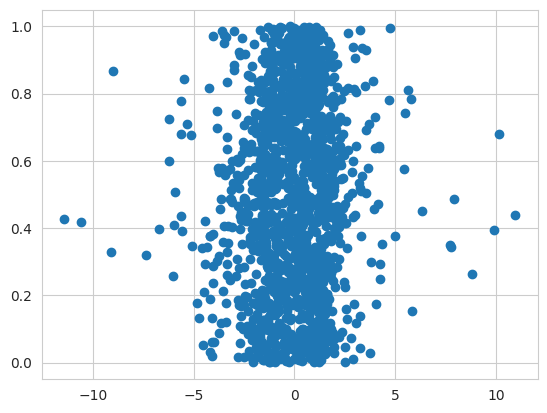

In [172]:
plt.scatter(zs2[:, 1], pts_torus[:, 0])

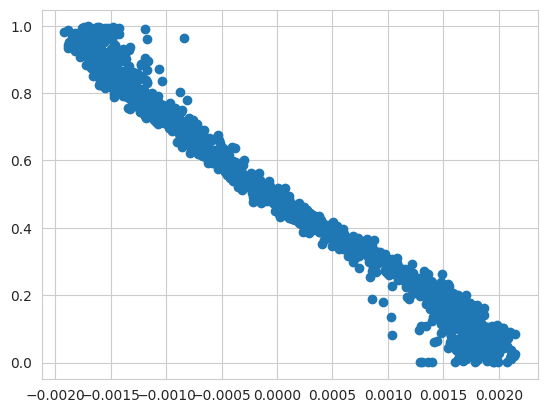

In [167]:
plt.scatter(zs[:, 0], pts_torus[:, 1])

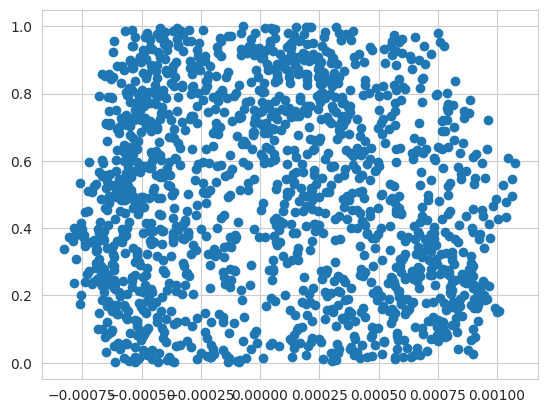

In [168]:
plt.scatter(zs[:, 1], pts_torus[:, 0])

(array([128., 164., 136., 158., 151., 144., 148., 162., 147., 162.]),
 array([4.82858091e-04, 1.00430469e-01, 2.00378080e-01, 3.00325691e-01,
        4.00273301e-01, 5.00220912e-01, 6.00168523e-01, 7.00116134e-01,
        8.00063745e-01, 9.00011356e-01, 9.99958966e-01]),
 <BarContainer object of 10 artists>)

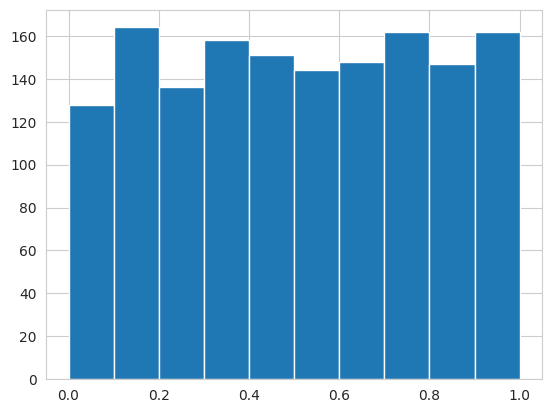

In [103]:
plt.hist(pts_torus[:, 0])

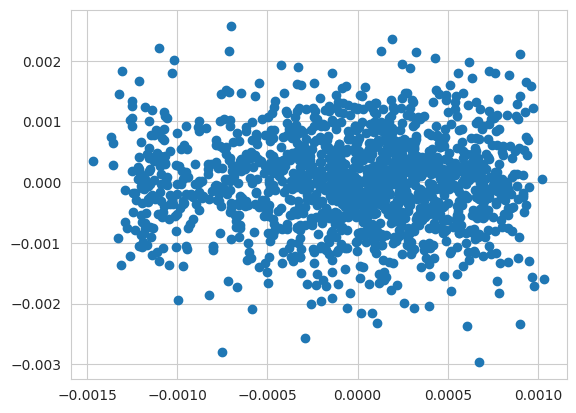

In [82]:
plt.scatter(ys, ys2)

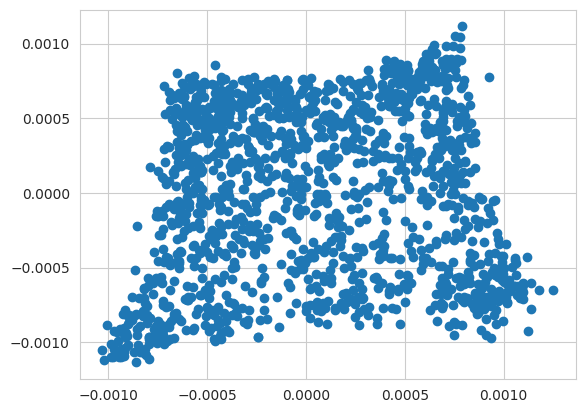

In [84]:
zs = np.stack([xs, ys])
zs3 = np.array([[0.701, -0.701], [0.701, 0.701]]) @ zs
xs3 = zs3[0, :]
ys3 = zs3[1, :]
plt.scatter(xs3, ys3)

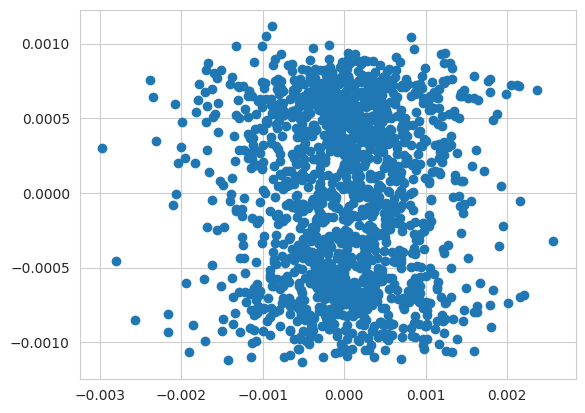

In [85]:
plt.scatter(ys2, ys3)

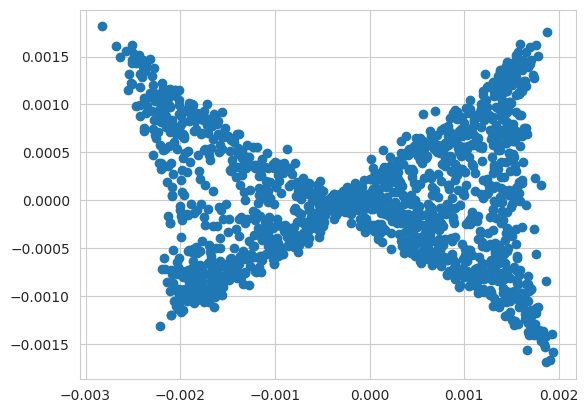

In [16]:
xs = pts[:, 0]
ys = pts[:, 2]
plt.figure()
plt.scatter(xs, ys)

'/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne'

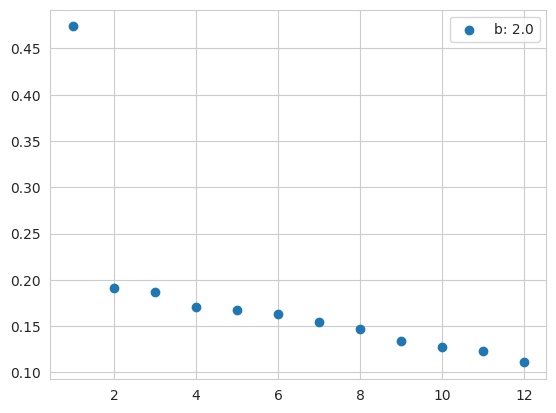

(962, 961)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

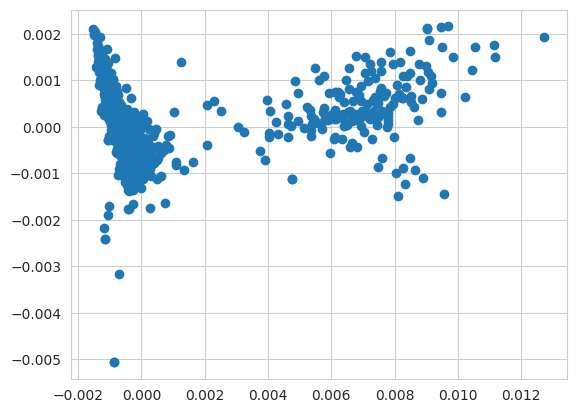

In [69]:
in_path = do_feature_extract.graph_dicts[2]['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

In [74]:
importlib.reload(utils)

<module 'benji_girgs.utils' from '../benji_girgs/utils.py'>

'/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne'

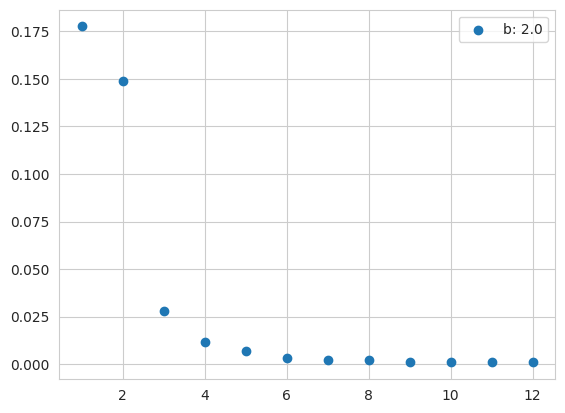

(1446, 1445)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

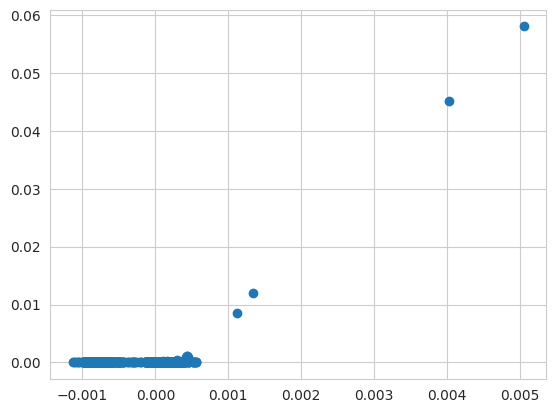

In [79]:
in_path = do_feature_extract.graph_dicts[3]['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.05)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

(1446, 1445)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

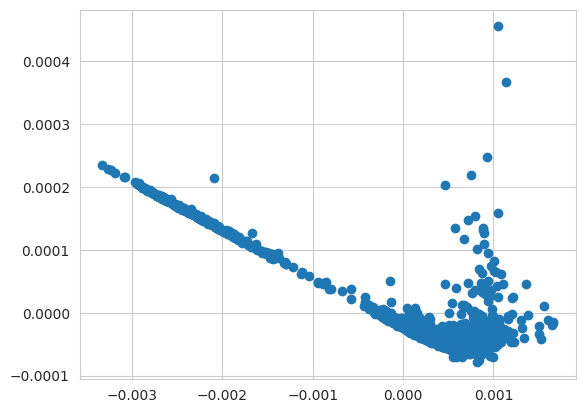

In [73]:
pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs[ys<0.0005], ys[ys<0.0005])

In [4]:
fe = feature_extractor.FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(2, utils.LCC, copy_weights=True, verbose=True)(g)
info = {a: eval(b) for a, b in [x.split('=') for x in info.split('|')]}

no results_df
calling goal_f(alpha=100.0)
const_in: 1.340113594783622
calling goal_f(alpha=2.0)
const_in: 0.27490234375


../benji_girgs/generation.py:66: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:67: RuntimeWarning: overflow encountered in power
  p_uv = np.power(p_uv, alpha)


calling goal_f(alpha=1.0101010101010102)
const_in: 0.21316927961240167
a: 0.01, m: 0.5, b: 0.99, f_a: 0.6690558694856963, f_m: 0.5495585155632337, f_b: 0.27463388601336725, goal: 0.4092943904851723

calling goal_f(alpha=1.342281879194631)
const_in: 0.23955207966845077
a: 0.5, m: 0.745, b: 0.99, f_a: 0.5495585155632337, f_m: 0.4024925243691354, f_b: 0.27463388601336725, goal: 0.4092943904851723

calling goal_f(alpha=1.6064257028112447)
const_in: 0.2557897516283552
a: 0.5, m: 0.6225, b: 0.745, f_a: 0.5495585155632337, f_m: 0.4606390268179841, f_b: 0.4024925243691354, goal: 0.4092943904851723

calling goal_f(alpha=1.462522851919561)
const_in: 0.24754138316240062
a: 0.6225, m: 0.6837500000000001, b: 0.745, f_a: 0.4606390268179841, f_m: 0.433183085206984, f_b: 0.4024925243691354, goal: 0.4092943904851723

calling goal_f(alpha=1.399825021872266)
const_in: 0.24350805017270755
a: 0.6837500000000001, m: 0.714375, b: 0.745, f_a: 0.433183085206984, f_m: 0.41912139422655925, f_b: 0.402492524369135

In [5]:
info
info['const']*(2**2)

{'tau': 7.3017225936374555,
 'alpha': 1.3704496788008564,
 'const': 0.08865820739266873,
 'target_lcc': 0.4092943904851723,
 'fit_lcc': 0.40608316251506005,
 'fitting_time': 1.4240760803222656,
 'hist': [(2.0, 0.5495585155632337),
  (1.342281879194631, 0.4024925243691354),
  (1.6064257028112447, 0.4606390268179841),
  (1.462522851919561, 0.433183085206984),
  (1.399825021872266, 0.41912139422655925),
  (1.3704496788008564, 0.4062200912227481),
  (1.384981605713049, 0.4202523103522985),
  (1.3704496788008564, 0.4062200912227481)]}

0.35463282957067493

In [31]:
nk.overview(g)

Network Properties:
nodes, edges			769, 16656
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.056404
clustering coefficient		0.409294
min/max/avg degree		1, 248, 43.318596
degree assortativity		-0.064376
number of connected components	4
size of largest component	762 (99.09 %)


In [32]:
nk.overview(g_out)

Network Properties:
nodes, edges			769, 16687
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.056509
clustering coefficient		0.277349
min/max/avg degree		22, 117, 43.399220
degree assortativity		0.068393
number of connected components	1
size of largest component	769 (100.00 %)


In [6]:
degrees = utils.graph_degrees_to_weights(g_out)
degrees2 = utils.graph_degrees_to_weights(g)

(array([241., 159., 165.,  90.,  70.,  21.,  11.,   7.,   3.,   2.]),
 array([  0. ,  20.2,  40.4,  60.6,  80.8, 101. , 121.2, 141.4, 161.6,
        181.8, 202. ]),
 <BarContainer object of 10 artists>)

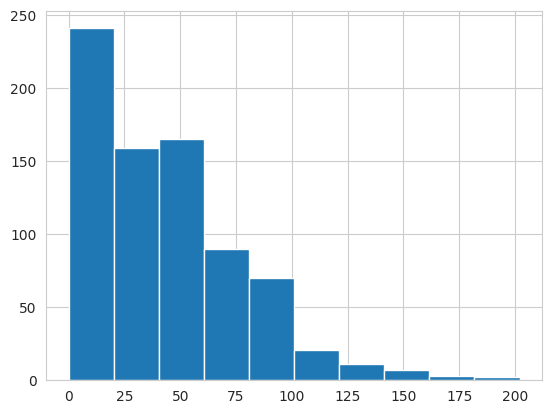

In [7]:
plt.hist(degrees)

(array([291., 213., 134.,  65.,  38.,  14.,  10.,   2.,   1.,   1.]),
 array([  1. ,  25.7,  50.4,  75.1,  99.8, 124.5, 149.2, 173.9, 198.6,
        223.3, 248. ]),
 <BarContainer object of 10 artists>)

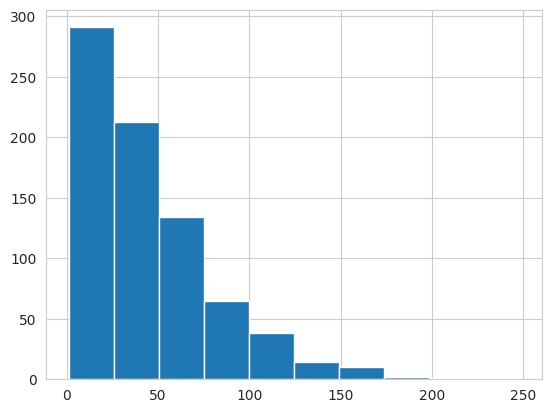

In [8]:
plt.hist(degrees2)

In [9]:
nk.overview(g)

Network Properties:
nodes, edges			769, 16656
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.056404
clustering coefficient		0.409294
min/max/avg degree		1, 248, 43.318596
degree assortativity		-0.064376
number of connected components	4
size of largest component	762 (99.09 %)


In [10]:
nk.overview(g_out)

Network Properties:
nodes, edges			769, 16699
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.056550
clustering coefficient		0.406083
min/max/avg degree		0, 202, 43.430429
degree assortativity		-0.014110
number of connected components	16
size of largest component	754 (98.05 %)


In [22]:
fe = feature_extractor.FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(2, utils.LCC, copy_weights=True, cube=True, verbose=True)(g)
info = {a: eval(b) for a, b in [x.split('=') for x in info.split('|')]}

no results_df
calling goal_f(alpha=100.0)
starting search at const=0.3008795499801636; depth=6: For alpha=100.0
a: 0.1504397749900818, m: 0.3008795499801636, b: 0.6017590999603272, f_a: 23.17295188556567, f_m: 42.543563068920676, f_b: 78.49414824447334, goal: 43.3185955786736
a: 0.3008795499801636, m: 0.4513193249702454, b: 0.6017590999603272, f_a: 42.543563068920676, f_m: 61.21976592977894, f_b: 78.49414824447334, goal: 43.3185955786736
a: 0.3008795499801636, m: 0.37609943747520447, b: 0.4513193249702454, f_a: 42.543563068920676, f_m: 51.20156046814044, f_b: 61.21976592977894, goal: 43.3185955786736
a: 0.3008795499801636, m: 0.338489493727684, b: 0.37609943747520447, f_a: 42.543563068920676, f_m: 47.466840052015606, f_b: 51.20156046814044, goal: 43.3185955786736
a: 0.3008795499801636, m: 0.3196845218539238, b: 0.338489493727684, f_a: 42.543563068920676, f_m: 45.568270481144346, f_b: 47.466840052015606, goal: 43.3185955786736
calling goal_f(alpha=2.0)
starting search at const=0.1572933

In [23]:
info

{'tau': 7.3017225936374555,
 'alpha': 1.2004126418456345,
 'const': 0.08792511489035083,
 'target_lcc': 0.4092943904851723,
 'fit_lcc': 0.40712064534031117,
 'fitting_time': 123.44451236724854,
 'hist': [(2.0, 0.5747502189664017),
  (1.342281879194631, 0.46700172418237007),
  (1.1527377521613833, 0.4029032632485276),
  (1.24031007751938, 0.4135300670751206),
  (1.194921583271098, 0.39436009103570274),
  (1.2171928489920123, 0.41011628809975376),
  (1.205954399849256, 0.42214930868724626),
  (1.2004126418456345, 0.3990793057960383)]}

(array([247., 210., 151.,  81.,  47.,  21.,   5.,   4.,   1.,   2.]),
 array([  0. ,  21.3,  42.6,  63.9,  85.2, 106.5, 127.8, 149.1, 170.4,
        191.7, 213. ]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

(array([291., 213., 134.,  65.,  38.,  14.,  10.,   2.,   1.,   1.]),
 array([  1. ,  25.7,  50.4,  75.1,  99.8, 124.5, 149.2, 173.9, 198.6,
        223.3, 248. ]),
 <BarContainer object of 10 artists>)

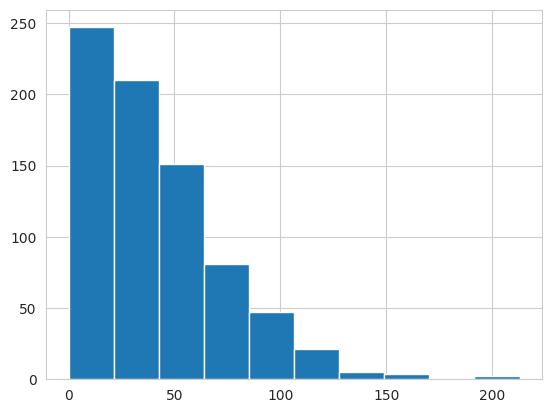

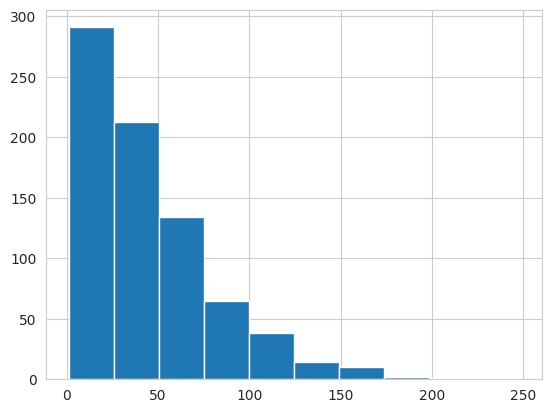

In [24]:
degrees = utils.graph_degrees_to_weights(g_out)
degrees2 = utils.graph_degrees_to_weights(g)
plt.hist(degrees)
plt.figure()
plt.hist(degrees2)

In [25]:
nk.overview(g)

Network Properties:
nodes, edges			769, 16656
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.056404
clustering coefficient		0.409294
min/max/avg degree		1, 248, 43.318596
degree assortativity		-0.064376
number of connected components	4
size of largest component	762 (99.09 %)


In [ ]:
g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(g.numberOfEdges(), d=2, tau=7.302, alpha=1.36, const=2.932, points_type=points.PointsTorus2)

const_in: 28.454082208484174


In [35]:
const

25.91

In [ ]:
generation.gen_cube_coupling(g, edges, weights, pts, const)

In [11]:
import importlib
importlib.reload(points)
importlib.reload(generation)

../benji_girgs/points.py:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (n, d == other.shape)


<module 'benji_girgs.points' from '../benji_girgs/points.py'>

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

const_in: 25.050032993579165
3.661116880295553


80.628

<Figure size 640x480 with 0 Axes>

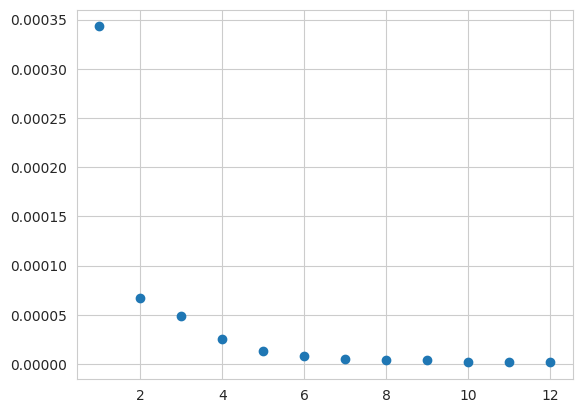

In [96]:
n = 1500
d = 2
tau = 2.1
alpha=1.2
desiredAvgDegree=100.0

pp = points.get_points_distorted(np.array([1.0, 1.6]), cube=True)

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
print(const)
utils.avg_degree(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g)

ys = w[1:13]**8
plt.figure()
plt.scatter(list(range(1, len(ys)+1)), ys)
plt.show()

(1500, 1499)

<Figure size 640x480 with 0 Axes>

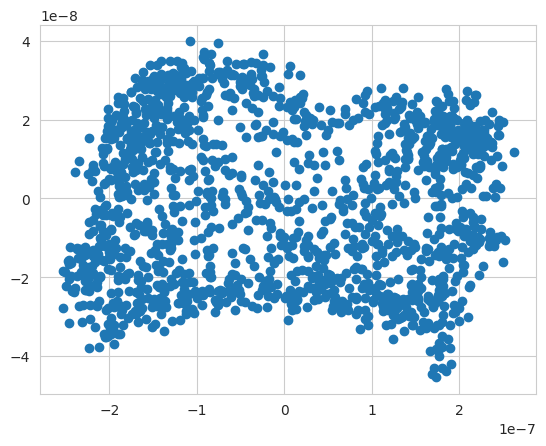

In [97]:
pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.scatter(xs, ys)

In [100]:
importlib.reload(utils)

<module 'benji_girgs.utils' from '../benji_girgs/utils.py'>

const_in: 19.421507061688533
2.961482117566697


78.67333333333333

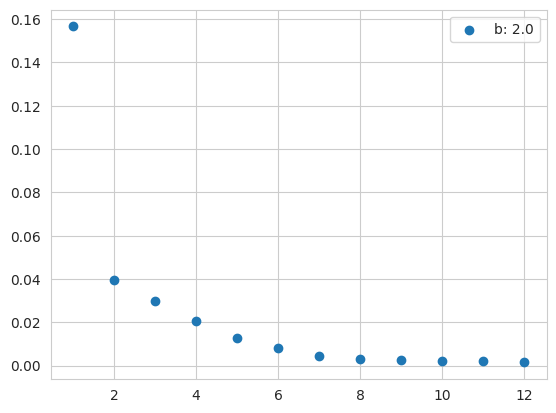

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

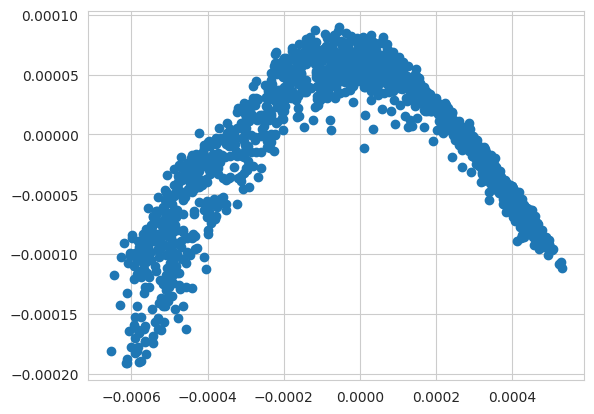

In [105]:
diff_maps = []

b = 2.0
n = 1500
d = 2
tau = 2.1
alpha=1.2
desiredAvgDegree=100.0

pp = points.get_points_distorted(np.array([1.0, b]), cube=True)

g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
print(const)
utils.avg_degree(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.1, eye_or_ones='eye')
diff_maps.append(diff_map)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

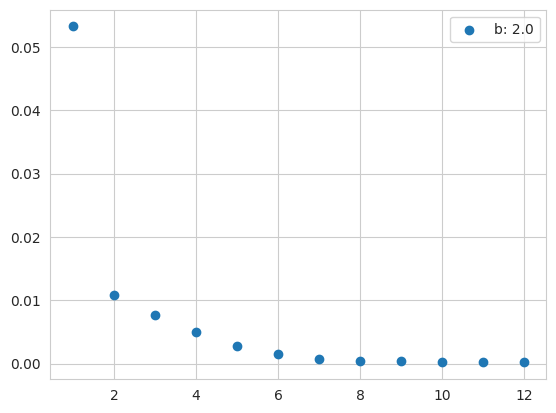

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

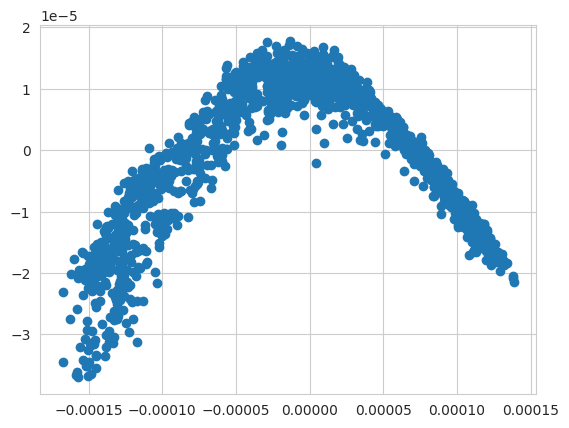

In [106]:
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.1, eye_or_ones='ones')
diff_maps.append(diff_map)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

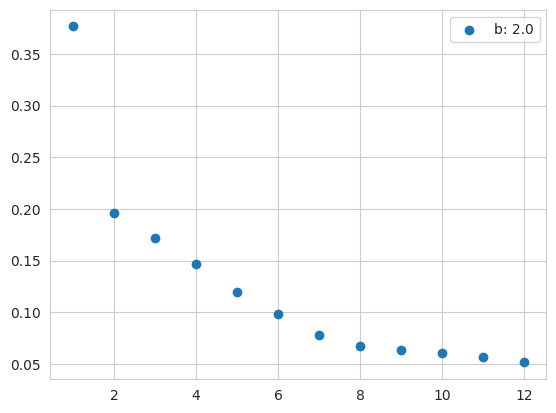

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

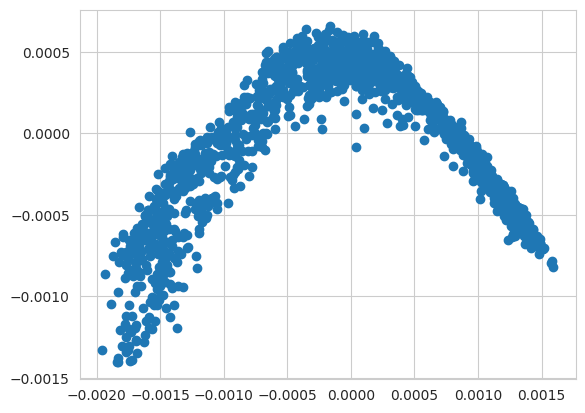

In [109]:
w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.5, eye_or_ones='eye')
diff_maps.append(diff_map)

ys = w[1:13]**8
#     plt.figure()
_ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()


pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.figure()
plt.scatter(xs, ys)

const_in: 15.875329551486383
2.503469472137306


79.09866666666667

const_in: 41.110918345017986
5.532282182895862


79.55333333333333

const_in: 30.32806463667074
4.293491322721445


79.532

const_in: 17.61749233992872
2.7304029937570284


76.16266666666667

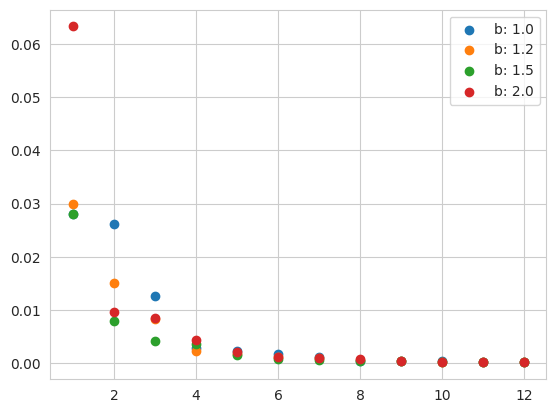

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

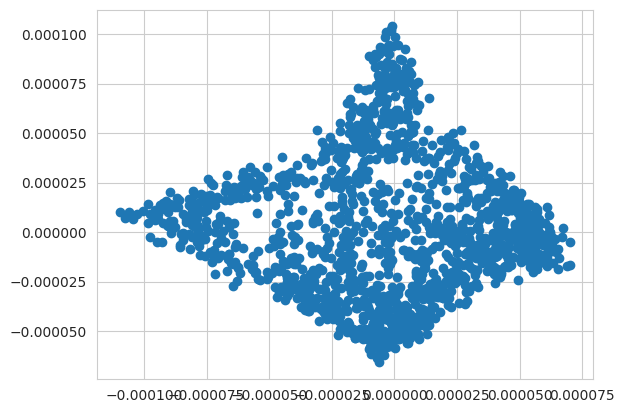

<Figure size 640x480 with 0 Axes>

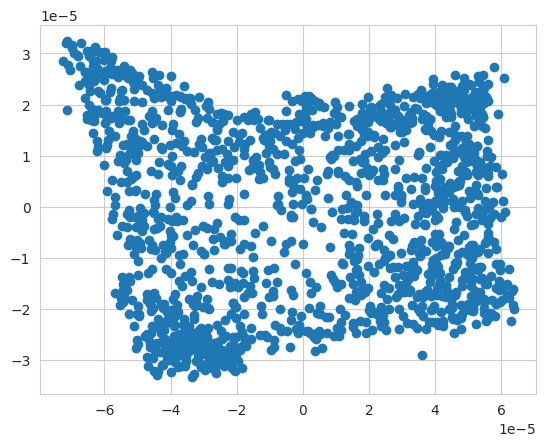

<Figure size 640x480 with 0 Axes>

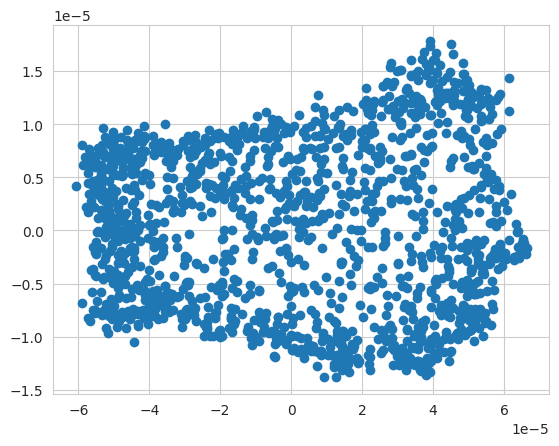

<Figure size 640x480 with 0 Axes>

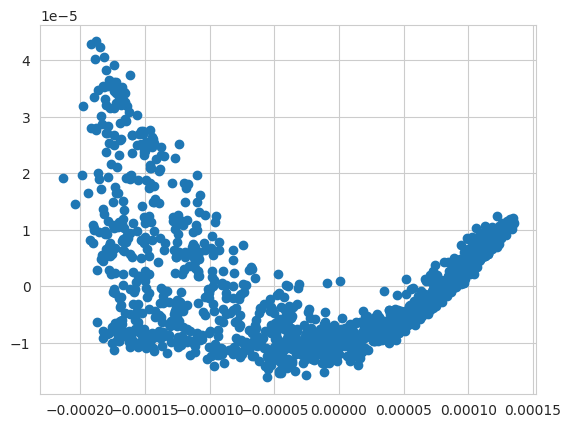

In [98]:
diff_maps = []

for b in [1.0, 1.2, 1.5, 2.0]:
    n = 1500
    d = 2
    tau = 2.1
    alpha=1.2
    desiredAvgDegree=100.0

    pp = points.get_points_distorted(np.array([1.0, b]), cube=True)

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.1)
    diff_maps.append(diff_map)

    ys = w[1:13]**8
#     plt.figure()
    _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()

for dm in diff_maps:
    pts = np.array([dm(i, 10) for i in range(n)])
    pts.shape
    plt.figure()
    xs = pts[:, 0]
    ys = pts[:, 1]
    plt.figure()
    plt.scatter(xs, ys)

const_in: 14.906315929512537
2.37546485811341


78.224

const_in: 23.792377016123748
3.507288863609456


79.09066666666666

const_in: 18.071073184256903
2.7888594600376404


77.78533333333333

const_in: 16.421688295790787
2.5750648992546097


74.904

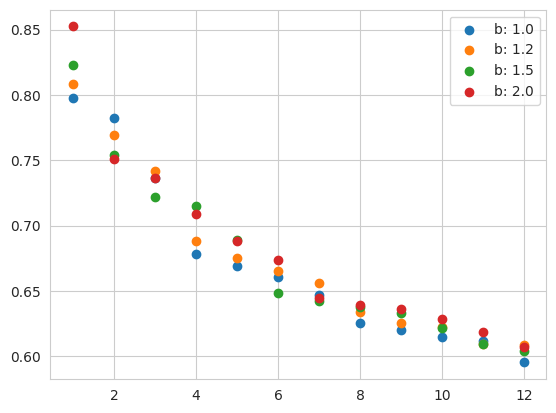

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(1500, 1499)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

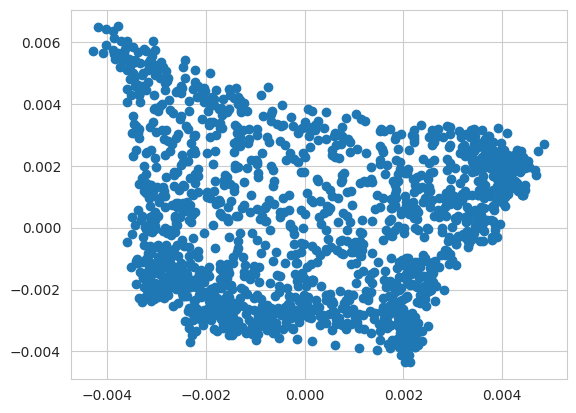

<Figure size 640x480 with 0 Axes>

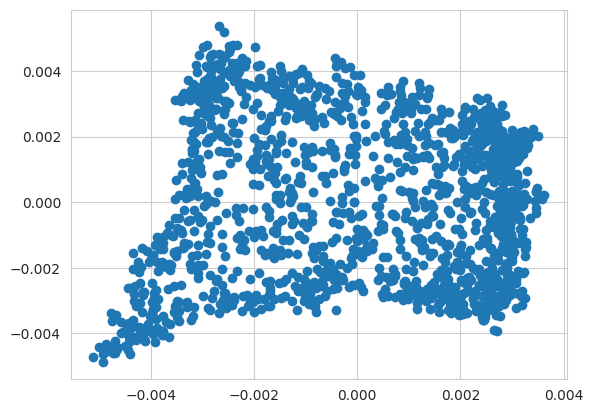

<Figure size 640x480 with 0 Axes>

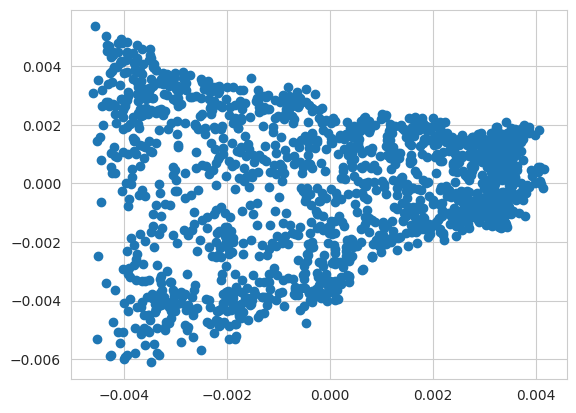

<Figure size 640x480 with 0 Axes>

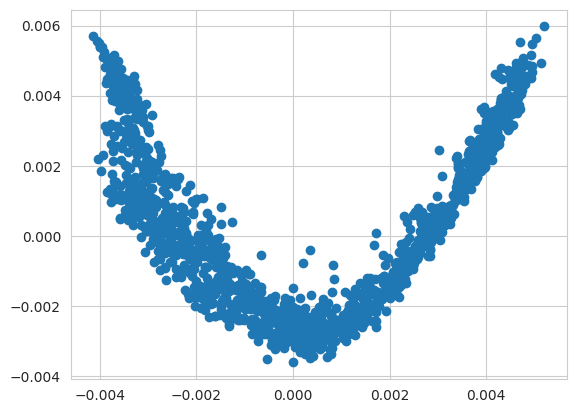

In [82]:
diff_maps = []

for b in [1.0, 1.2, 1.5, 2.0]:
    n = 1500
    d = 2
    tau = 2.1
    alpha=1.2
    desiredAvgDegree=100.0

    pp = points.get_points_distorted(np.array([1.0, b]), cube=True)

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g, Iweighting=0.9)
    diff_maps.append(diff_map)

    ys = w[1:13]**8
#     plt.figure()
    _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()
plt.legend()
plt.show()

for dm in diff_maps:
    pts = np.array([dm(i, 10) for i in range(n)])
    pts.shape
    plt.figure()
    xs = pts[:, 0]
    ys = pts[:, 1]
    plt.figure()
    plt.scatter(xs, ys)

(1500, 1499)

<Figure size 640x480 with 0 Axes>

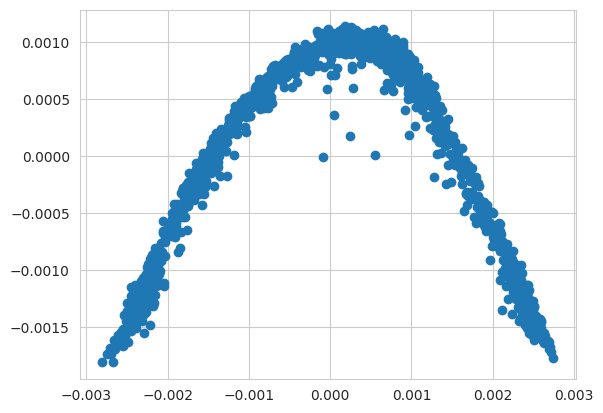

In [40]:
pts = np.array([diff_map(i, 10) for i in range(n)])
pts.shape
plt.figure()
xs = pts[:, 0]
ys = pts[:, 1]
plt.scatter(xs, ys)

In [4]:
points_type = pp
pts = generation.generatePositions(n, d)
pts = points_type(pts)

In [10]:
pts.__class__.__bases__[0].dists

<function benji_girgs.points.PointsTorus2.dists(self, b_vec=None)>

const_in: 21.412455273616608
6.424786914343477


100.092

const_in: 23.252167482791542
6.881601814596416


100.104

const_in: 18.00225703221916
5.5600129461383645


99.97733333333333

const_in: 18.074050679406472
5.578484757409374


100.068

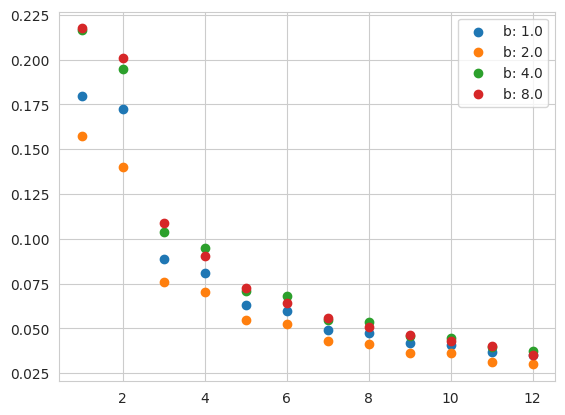

In [19]:
for b in [1.0, 2.0, 4.0, 8.0]:
    pp = points.get_points_distorted(np.array([b]))

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, 1, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g)

    ys = w[1:13]**8
    #     plt.figure()
    _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
    #     plt.show()

    _ = plt.legend()

const_in: 18.658666550772956
2.8642253109169276


100.17866666666667

const_in: 19.194716639524444
2.9326355602499077


99.05066666666667

const_in: 144.32117774078532
15.753669458560509


98.62266666666666

const_in: 20.83379287243765
3.139884168739953


95.02666666666667

const_in: 26.616948637621977
3.8509856247821808


84.6

const_in: 48.49191572090387
6.348402588864481


71.384

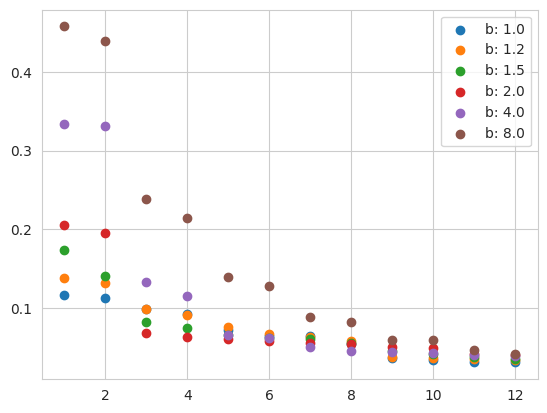

In [17]:
for b in [1.0, 1.2, 1.5, 2.0, 4.0, 8.0]:
    pp = points.get_points_distorted(np.array([1.0, b]))

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g)

    ys = w[1:13]**8
    #     plt.figure()
    _ = plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
    #     plt.show()

    _ = plt.legend()

1.0
const_in: 3.4765625
2.824609189999886


99.83733333333333

5.0
const_in: 3.4492187499999996
2.806083662389909


100.472

20.0
const_in: 2.818359375
2.3713571888780955


99.75333333333333

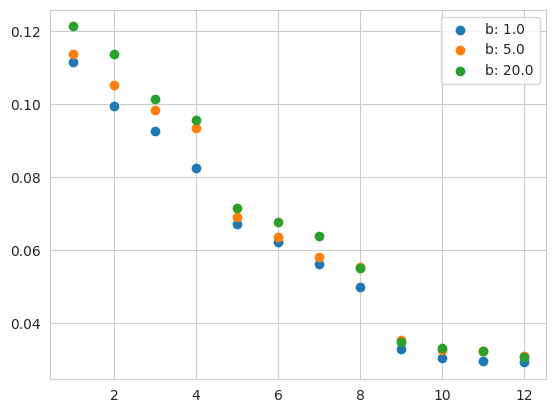

In [50]:
for b in [1.0, 5.0, 20.0]:
    print(b)

    pp = points.get_points_distorted(np.array([1.0, b]))

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g)

    ys = w[1:13]**8
#     plt.figure()
    plt.scatter(list(range(1, len(ys)+1)), ys, label=f'b: {b}')
#     plt.show()

plt.legend()

In [6]:
g, edges, weights, pts_torus, const = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)

1.0
const_in: 3.96484375
3.1515320693835718


100.50266666666667

<Figure size 640x480 with 0 Axes>

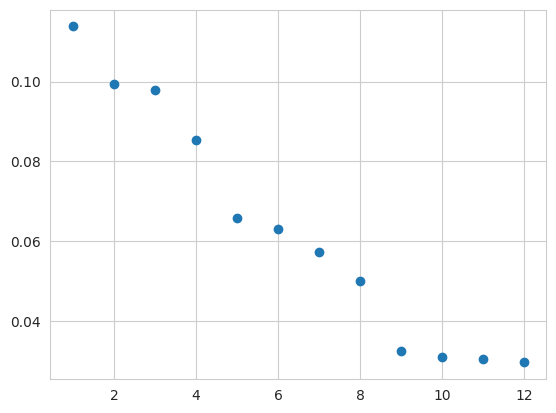

1.1
const_in: 3.474609375
2.8232867454974717


100.068

<Figure size 640x480 with 0 Axes>

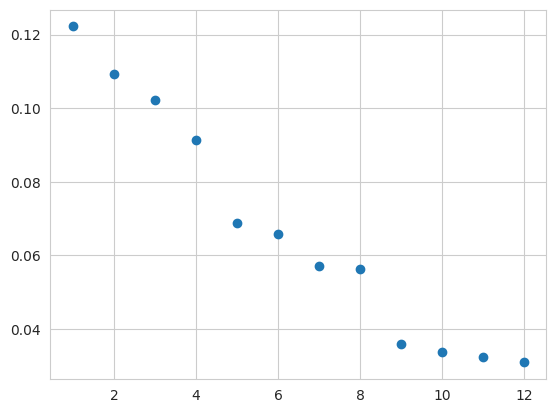

1.3
const_in: 2.9765625
2.481775569233533


100.13333333333334

<Figure size 640x480 with 0 Axes>

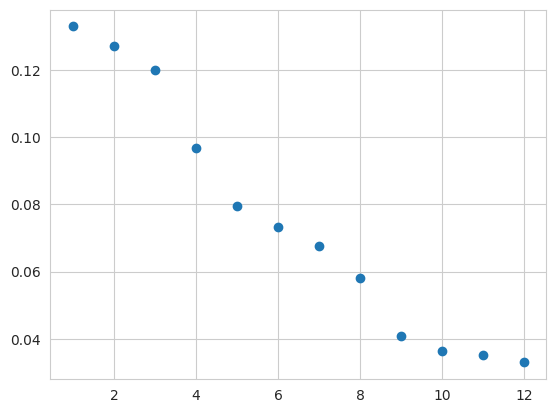

1.5
const_in: 3.583984375
2.8971551696590954


100.40933333333334

<Figure size 640x480 with 0 Axes>

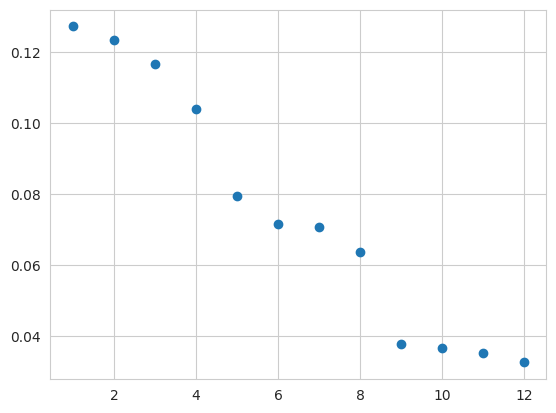

2.0
const_in: 3.7753906250000004
3.025530793878593


100.24933333333334

<Figure size 640x480 with 0 Axes>

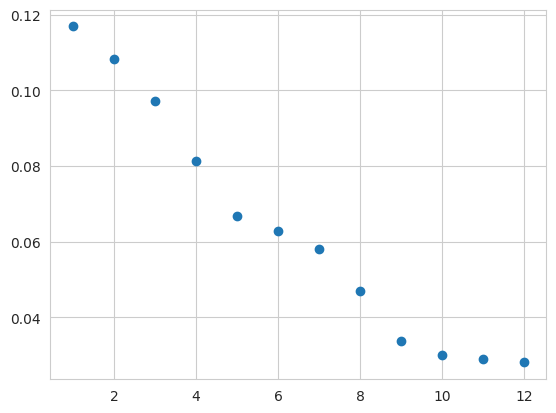

4.0
const_in: 3.294921875
2.70108095858764


99.872

<Figure size 640x480 with 0 Axes>

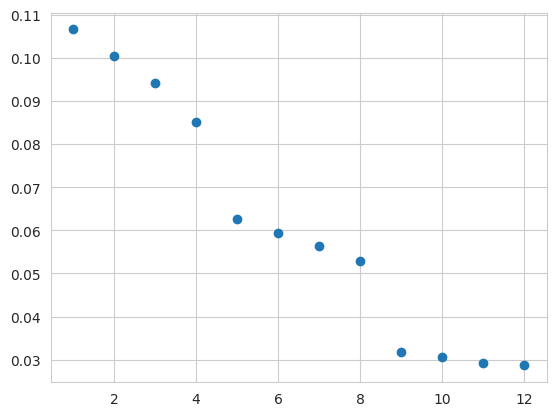

In [48]:
for b in [1.0, 1.1, 1.3, 1.5, 2.0, 4.0]:
    print(b)

    pp = points.get_points_distorted(np.array([1.0, b]))

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g)

    ys = w[1:13]**8
    plt.figure()
    plt.scatter(list(range(1, len(ys)+1)), ys)
    plt.show()

1.0
const_in: 16.174280562520867
16.174280562520867


99.78933333333333

<Figure size 640x480 with 0 Axes>

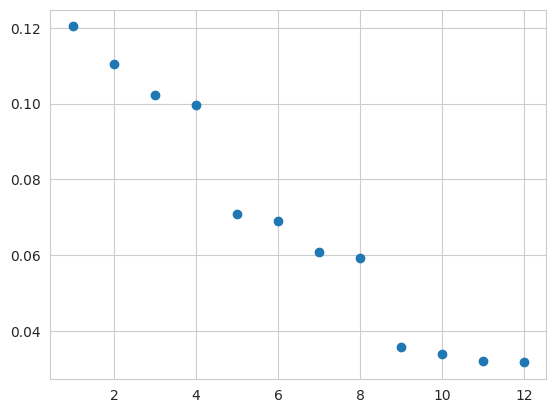

1.1
const_in: 16.091811318097562
16.091811318097562


99.89333333333333

<Figure size 640x480 with 0 Axes>

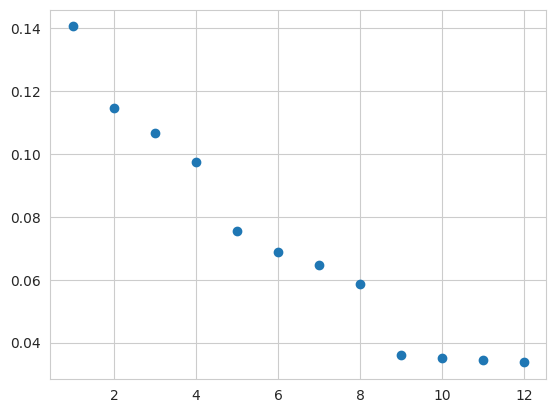

1.3
const_in: 19.132864706206966
19.132864706206966


99.73466666666667

<Figure size 640x480 with 0 Axes>

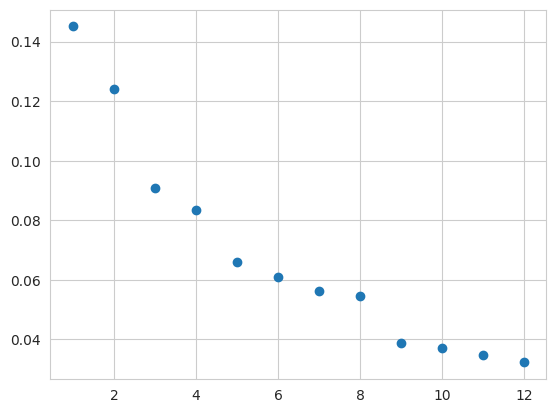

1.5
const_in: 16.01965072922717
16.01965072922717


97.75466666666667

<Figure size 640x480 with 0 Axes>

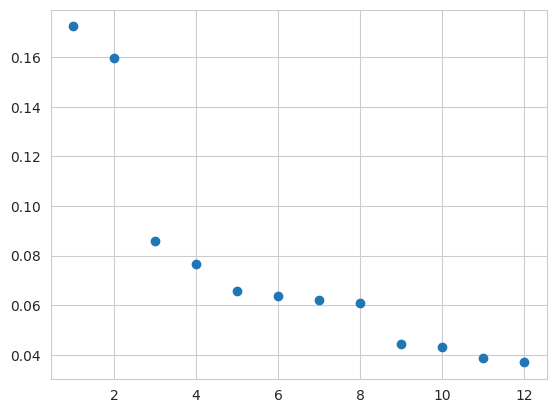

2.0
const_in: 39.791410434245094
39.791410434245094


95.112

<Figure size 640x480 with 0 Axes>

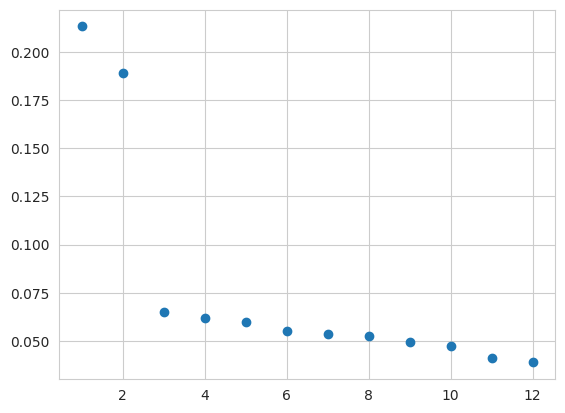

4.0
const_in: 16.669096029060704
16.669096029060704


84.052

<Figure size 640x480 with 0 Axes>

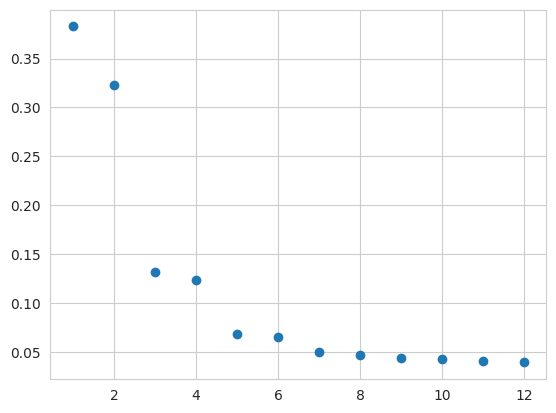

In [11]:
for b in [1.0, 1.1, 1.3, 1.5, 2.0, 4.0]:
    print(b)

    pp = points.get_points_distorted(np.array([1.0, b]))

    g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=pp)
    print(const)
    utils.avg_degree(g)

    w, Phi, Psi, diff_map = utils.get_diffmap(g)

    ys = w[1:13]**8
    plt.figure()
    plt.scatter(list(range(1, len(ys)+1)), ys)
    plt.show()

const_in: 14.926933240618366
14.926933240618366


99.64

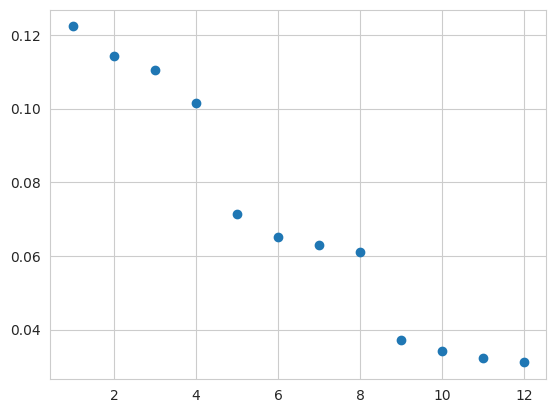

In [6]:
g, edges, weights, pts_torus, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2)
print(const)
utils.avg_degree(g)

w, Phi, Psi, diff_map = utils.get_diffmap(g)

ys = w[1:13]**8
plt.scatter(list(range(1, len(ys)+1)), ys)